<a href="https://colab.research.google.com/github/KannitP/Malaria-classification-2/blob/main/Malaraia_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dataset

In [ ]:
#Import kaggel

! pip install kaggle
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download dataset

!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
!unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_im

#Data Explor

In [ ]:
#Import library

from PIL import Image
from glob import glob
import torchvision
from pathlib import Path
from collections import Counter
import os
import shutil

In [ ]:
# Remove duplicate folder

shutil.rmtree ("/content/cell_images/cell_images")

In [ ]:
# Total classes of data

data = '/content/cell_images'

print('Total number of classes: ', os.listdir(data))

Total number of classes:  ['Parasitized', 'Uninfected']


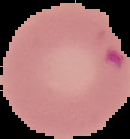

In [ ]:
P_paths = glob("cell_images/Parasitized/*.png")
P_img = Image.open(P_paths[10])
Image.open(P_paths[10])

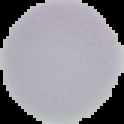

In [ ]:
Un_paths = glob("cell_images/Uninfected/*.png")
Un_img = Image.open(Un_paths[10])
Image.open(Un_paths[10])

In [ ]:
print( 'Parasitized Size: ', P_img.size, "\n" 'Uninfected Size: ', Un_img.size)

Parasitized Size:  (130, 139) 
Uninfected Size:  (124, 124)


In [ ]:
Counter([Path(path).parent.name for path in P_paths])

Counter({'Parasitized': 13779})

In [ ]:
Counter([Path(path).parent.name for path in Un_paths])

Counter({'Uninfected': 13779})

#Resize Data

In [ ]:
# Create directory to Parasitized and Uninfected files
dir_path_P = '/content/cell_images/Parasitized'
dir_path_UnP = '/content/cell_images/Uninfected'

# Define the images size   
target_size = (224, 224)

##Parasitized

In [ ]:
# RESIZE DATA IN PARASITIZED FOLDER

for filename in os.listdir(dir_path_P):

  # Check if the file is an image
  if filename.endswith('.jpg') or filename.endswith('.png'):

    # Open the image
    img_path_P = os.path.join(dir_path_P, filename)
    img = Image.open(img_path_P)

    # Resize 
    img = img.resize(target_size)

    # Replace the original image
    img.save(img_path_P)

##Uninfected

In [ ]:
# RESIZE DATA IN UNINFECTED FOLDER

for filename in os.listdir(dir_path_UnP):

  # Check if the file is an image
  if filename.endswith('.jpg') or filename.endswith('.png'):

    # Open the image
    img_path_UnP = os.path.join(dir_path_UnP, filename)
    img = Image.open(img_path_UnP)

    # Resize 
    img = img.resize(target_size)

    # Replace the original image 
    img.save(img_path_UnP)

##Recheck data

In [ ]:
# Recheck Parasitized data

Counter([Path(path).parent.name for path in P_paths])

Counter({'Parasitized': 13779})

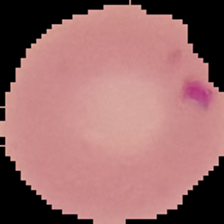

In [ ]:
Try_P_paths = glob('/content/cell_images/Parasitized/*.png')
Try_P = Image.open(Try_P_paths[10])
Image.open(Try_P_paths[10])

In [ ]:
# Recheck Uninfected data

Counter([Path(path).parent.name for path in Un_paths])

Counter({'Uninfected': 13779})

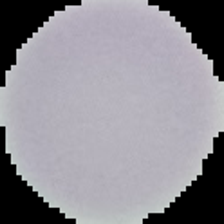

In [ ]:
Try_UnP_paths = glob('/content/cell_images/Uninfected/*.png')
Try_UnP = Image.open(Try_UnP_paths[10])
Image.open(Try_UnP_paths[10])

In [ ]:
print( 'Parasitized Resize: ', Try_P.size, "\n" 'Uninfected Size: ', Try_UnP.size)

Parasitized Resize:  (224, 224) 
Uninfected Size:  (224, 224)


#Split data

In [ ]:
# Import library

import shutil
import random

In [ ]:
# Define the direction 

original_dir = '/content/cell_images'
train_dir = '/content/train'
val_dir = '/content/validation'
test_dir = '/content/test'

# Define the subdirectories in the train, validation, and test sets

train_subdirs = ['Parasitized', 'Uninfected']
val_subdirs = ['Parasitized', 'Uninfected']
test_subdirs = ['Parasitized', 'Uninfected']

# Split ratio

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [ ]:
# Loop over each subdirectory in the original data directory
for subdir in os.listdir(original_dir):
    subdir_path = os.path.join(original_dir, subdir)
    
    # Skip any non-directory files
    if not os.path.isdir(subdir_path):
        continue
    
    # Create the corresponding subdirectories in the train, validation, and test sets
    train_subdir_path = os.path.join(train_dir, subdir)
    os.makedirs(train_subdir_path, exist_ok=True)
    
    val_subdir_path = os.path.join(val_dir, subdir)
    os.makedirs(val_subdir_path, exist_ok=True)
    
    test_subdir_path = os.path.join(test_dir, subdir)
    os.makedirs(test_subdir_path, exist_ok=True)
    
    # Get the list of all image files in the subdirectory
    images = os.listdir(subdir_path)
    
    # Shuffle the list of images
    random.shuffle(images)
    
    # Split the images into train, validation, and test sets
    num_images = len(images)
    num_train = int(num_images * train_ratio)
    num_val = int(num_images * val_ratio)
    
    train_images = images[:num_train]
    val_images = images[num_train:num_train+num_val]
    test_images = images[num_train+num_val:]
    
    # Copy the images into the corresponding subdirectories in the train, validation, and test sets
    for image in train_images:
        src_path = os.path.join(subdir_path, image)
        dst_path = os.path.join(train_subdir_path, image)
        shutil.copy(src_path, dst_path)
    
    for image in val_images:
        src_path = os.path.join(subdir_path, image)
        dst_path = os.path.join(val_subdir_path, image)
        shutil.copy(src_path, dst_path)
    
    for image in test_images:
        src_path = os.path.join(subdir_path, image)
        dst_path = os.path.join(test_subdir_path, image)
        shutil.copy(src_path, dst_path)

In [ ]:
# Check the amount of data in each folder

# Original data
print("Ori Parasitized: ", len(os.listdir('/content/train/Parasitized'))+len(os.listdir('/content/test/Parasitized'))+len(os.listdir('/content/validation/Parasitized')),
      "\t" "Ori Uninfected: ", len(os.listdir('/content/train/Uninfected'))+len(os.listdir('/content/test/Uninfected'))+len(os.listdir('/content/validation/Uninfected')))

# Train
print("Train Parasitized: ", len(os.listdir('/content/train/Parasitized')),
      "\t" "Train Uninfected: ", len(os.listdir('/content/train/Uninfected')))

# Test 
print("Test Parasitized: ", len(os.listdir('/content/test/Parasitized')),
      "\t" "Test Uninfected: ", len(os.listdir('/content/test/Uninfected')))

# Validate
print("Val Parasitized: ", len(os.listdir('/content/validation/Parasitized')),
      "\t" "Val Uninfected: ", len(os.listdir('/content/validation/Uninfected')))
                                                

Ori Parasitized:  13780 	Ori Uninfected:  13780
Train Parasitized:  9646 	Train Uninfected:  9646
Test Parasitized:  2067 	Test Uninfected:  2067
Val Parasitized:  2067 	Val Uninfected:  2067


#Model


In [ ]:
# Import libraries for ResNet50

# REF: https://datagen.tech/guides/computer-vision/resnet-50/

import matplotlib.pyplot as plt
import numpy as np
import PIL as image_lib
import tensorflow as tflow
from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

In [ ]:
# Data augmentation

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [ ]:
# Load images from directories and create batches of images

train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=123
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 19291 images belonging to 2 classes.
Found 4133 images belonging to 2 classes.
Found 4134 images belonging to 2 classes.


In [ ]:
# Import ResNet-50

resnet_model = Sequential()

pretrained_model = tflow.keras.applications.ResNet50(
    include_top=False,
    pooling='avg',classes=2,
    weights='imagenet')

for each_layer in pretrained_model.layers:

        each_layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())

resnet_model.add(Dense(512, activation='relu'))

resnet_model.add(Dense(2, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Model summary

resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Train model

optm = Adam(learning_rate=0.0001)

resnet_model.compile(
    optimizer= optm,
    loss ='categorical_crossentropy',
    metrics =['accuracy'])


In [ ]:
epochs=10

history = resnet_model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)
     

Epoch 1/10
785/785 [==============================] - 468s 596ms/step - loss: 0.6573 - accuracy: 0.6111 - val_loss: 0.6704 - val_accuracy: 0.5597
Epoch 2/10
785/785 [==============================] - 466s 594ms/step - loss: 0.6570 - accuracy: 0.6101 - val_loss: 0.6478 - val_accuracy: 0.5951
Epoch 3/10
785/785 [==============================] - 468s 596ms/step - loss: 0.6541 - accuracy: 0.6186 - val_loss: 0.6250 - val_accuracy: 0.6693
Epoch 4/10
785/785 [==============================] - 477s 608ms/step - loss: 0.6563 - accuracy: 0.6097 - val_loss: 0.6867 - val_accuracy: 0.5509
Epoch 5/10
785/785 [==============================] - 492s 626ms/step - loss: 0.6524 - accuracy: 0.6221 - val_loss: 0.7834 - val_accuracy: 0.5160
Epoch 6/10
785/785 [==============================] - 516s 657ms/step - loss: 0.6503 - accuracy: 0.6195 - val_loss: 0.6276 - val_accuracy: 0.6429
Epoch 7/10
785/785 [==============================] - 485s 617ms/step - loss: 0.6537 - accuracy: 0.6154 - val_loss: 0.6346 -

In [ ]:
import torch

# Mount Google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Save model

model_save_name = 'Resnet_model.pt'

path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(resnet_model, path)

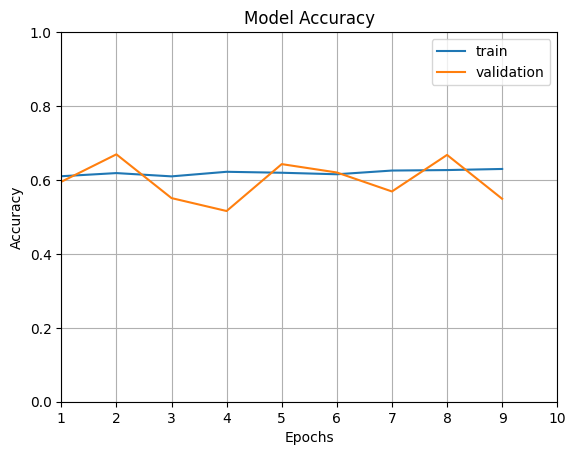

In [ ]:
# Evaluate the model

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")

plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

# Plot model accuracy

plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim([1, 10])
plt.ylim([0, 1])
plt.legend(['train', 'validation'])

##Test data

In [ ]:
# Load model

model_path = '/content/gdrive/MyDrive/Resnet_model.pt'
load = torch.load(model_path)

In [ ]:
# Load the test data

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes= test_subdirs,
    shuffle=False
)

Found 4134 images belonging to 2 classes.


In [ ]:
# Load images from directories and create batches of images

test_data = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4134 images belonging to 2 classes.


In [ ]:
# predict

test_pred = load.predict(test_data) 

130/130 [==============================] - 18s 123ms/step


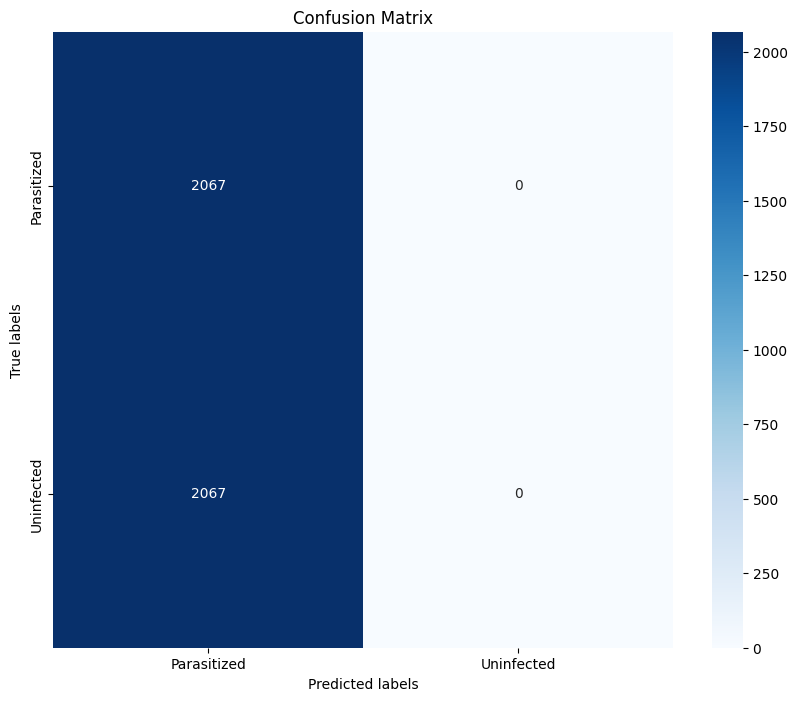

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# convert prediction to class label
test_pred_label = np.argmax(test_pred, axis=1)

# Get the true labels from the test data generator
true_labels = test_data.classes

# confusion matrix
cm = confusion_matrix(true_labels, test_pred_label)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=test_subdirs, yticklabels=test_subdirs)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#Gradio

In [ ]:
!pip install gradio
!pip install git+https://github.com/huggingface/transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
import gradio as gr
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
# Load model

model_path = '/content/gdrive/MyDrive/Resnet_model.pt'
load = torch.load(model_path)

In [ ]:
# confirm that the model was successfully loaded

load.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
import numpy as np

def classify_cell(img):
    img = image.array_to_img(img)
    img = img.resize((224, 224))
    x = image.img_to_array(img)
    x = preprocess_input(x)
    x = tf.expand_dims(x, axis=0)
    pred = load.predict(x)
    predicted_class_idx = np.argmax(pred[0])
    predicted_class_prob = pred[0][predicted_class_idx]
    return {class_name[predicted_class_idx]: float(predicted_class_prob)}


In [ ]:
# Define the Gradio interface
inputs = gr.inputs.Image(shape=(224, 224))
outputs = gr.outputs.Label(num_top_classes=2)


interface = gr.Interface(fn=classify_cell, inputs=inputs, outputs=outputs, 
                         title='Malaria Classifier', 
                         description='Classify whether the cell is infected with Plasmodium or not')

# Launch the interface
interface.launch(debug="True")

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 207ms/step
Keyboard interruption in main thread... closing server.
